NAME = "Ayah Nassar"

## Introduction

 
* In **Part I**, we will explore the data and preprocess it.
* In **Part II**, we will apply supervised machine learning models on the same dataset, evaluate its perofrmance, and identify the best models.

In this file (Part I), we will analyze the Pima-Indians-Diabetes-Data using Python’s Pandas. The dataset can be downloaded from kaggle (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download). This dataset consists of several medical predictor (independent) variables and one target (dependent) variable, Outcome. 

The columns of this dataset are as follows:

1. Pregnancies — Number of times pregnant
2. GlucosePlasma — glucose concentration 2 hours in an oral glucose tolerance test
3. Blood Pressure — Diastolic blood pressure (mm Hg)
4. SkinThickness — Triceps skin-fold thickness (mm)
5. Insulin — Two hours of serum insulin (mu U/ml)
6. BMI — Body mass index (weight in kg/(height in m)²)
7. Diabetes Pedigree Function — Diabetes pedigree function
8. Age — Age in years
9. Outcome — Class variable (indicates whether the patient is diabetic or not)

The first eight columns represent the independent variables, and the last column denotes the binary dependent variable. The outcome variable is set to 1 if the patient tested positive for diabetes, and is set to 0 if the patient tested negative for diabetes.


In [1017]:
# import important libraries
import pandas as pd
import seaborn as sns # for visualization
import numpy as np 
import matplotlib.pyplot as plt

In [1018]:
# read the data from the csv file as pandas DF
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 1. Analyze the distribution of diabetes (the outcome) among the patients and commenting on the results

In [1019]:
# calc distribution of diabetes among outcome in percentage
db_counts = df['Outcome'].value_counts()
disrtib = db_counts/ db_counts.sum()
disrtib
# 0 non diabetec
# 1 biabetec

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

# commenting on result above:
we can see that 65% of patients are non-diabetec, 
and 35% of them are diabetec.

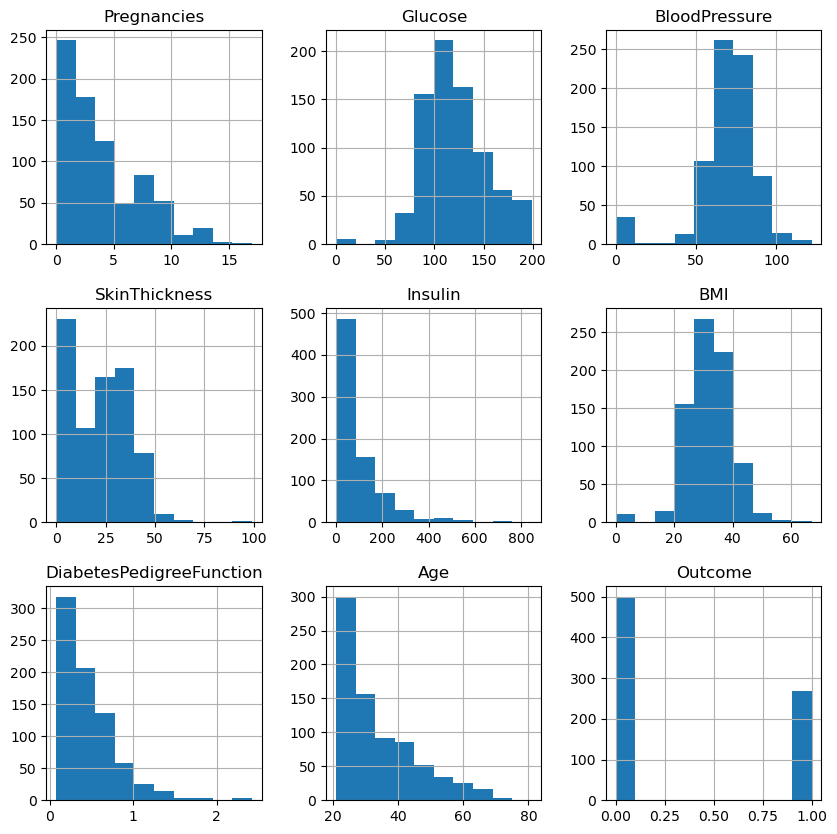

In [1020]:
# Analyze the calculated distribution above using histogram
df.hist(figsize = (10,10));
# and adjusting the figure size so that they don't overlap.

# semi colon is optional, to remove the array that will be printed with the graph 

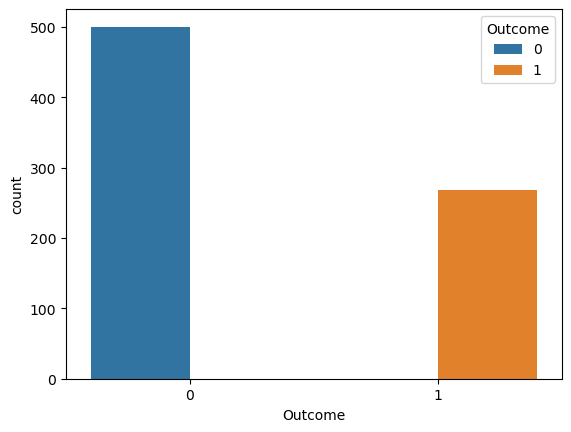

0    500
1    268
Name: Outcome, dtype: int64

In [1021]:
# outcome countplot
sns.countplot(data = df, x = 'Outcome', hue = 'Outcome');
plt.show()

outcome_counts = df['Outcome'].value_counts()
outcome_counts
# the calculated distribution analyzed 

# general comment on task 1 
as we can see that the blue bar is higher than the orange one
which confirms our invetigation above that there are more non-diabetec patients than petients who have diabetes

## 2. Compute descriptive statistics of the data and Commenting on the results.

In [1022]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# General Comment on task2

the minimum values for many varaibles = 0 
BMI, Insulin, Skin Thickness, Glucose, and Blood Pressure cannot have zero values; so it appears that null values have been entered as zeros.
moreover, the mean value of blood pressure is 69.1 while the insulin mean is 79.7

## 3. Analyze the skew of medical variables distributions and Commenting on the results.

In [1023]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

# General Comment on task3 

A right-skewed/positive skewed distribution is indicated by a positive value and has a tail to the right.the mean is to the right of the peak. 
a left-skewed/negative skewed distribution is indicated by a negative number and has a tail to the left. the mean is to the left of the peak.
Less skewed distributions are associated with values that are nearer to zero.
if its zero then no skew
if positive 1 this means dtrong postive skew, and -1 strong negative skew.

# 4. Data Visualization- Univariate Analysis** 
  
  we will Use univariate plots (histograms and boxplots) to analyze patterns in each of the medical variables with respect to the outcome (diabetes). and we will state what categories of patients were most likely to have diabetes.
  
  

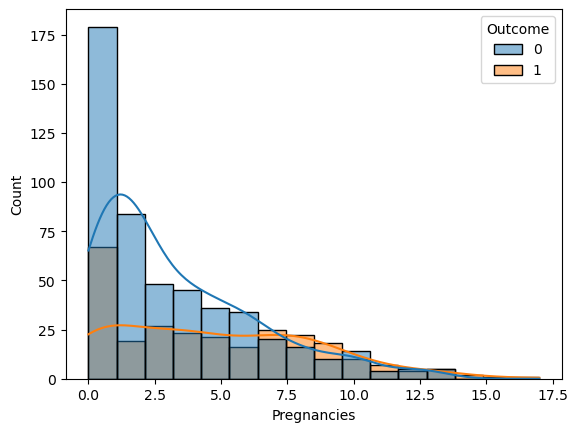

In [1024]:
#Q2
# pregnancy and outcome histogram
sns.histplot(data = df, x = 'Pregnancies', hue = 'Outcome', kde = True);

# hue is to show the box of outcome distribution on the right
# Kernel Density Estimation: kde true means will draw a curve on a histogram 

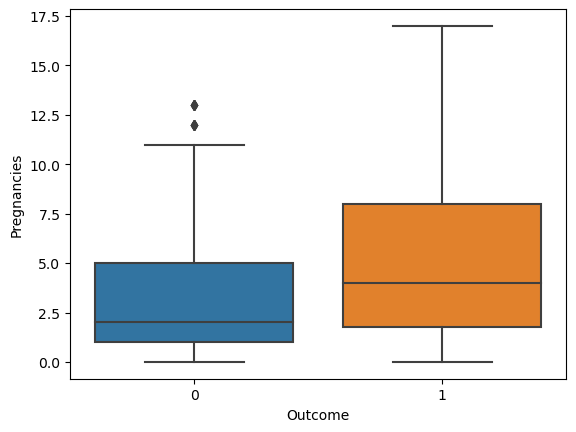

In [1025]:
# Pregnancies and outcome boxplot
sns.boxplot(data = df, x = 'Outcome', y = 'Pregnancies');

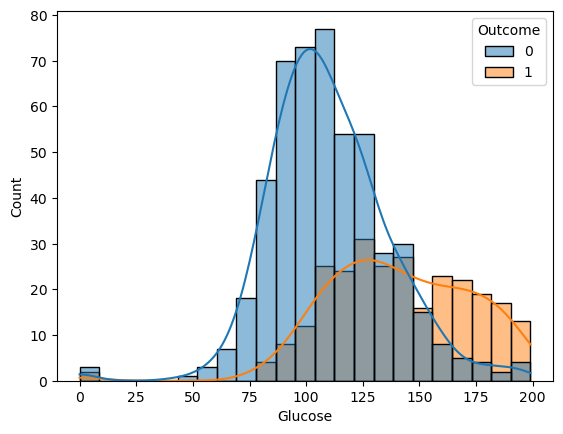

In [1026]:
# Glucose and outcome histogram
sns.histplot(data = df, x = 'Glucose', hue = 'Outcome', kde = True);

# hue is to show the box of outcome distribution on the right
# Kernel Density Estimation: kde true means will draw a curve on a histogram 

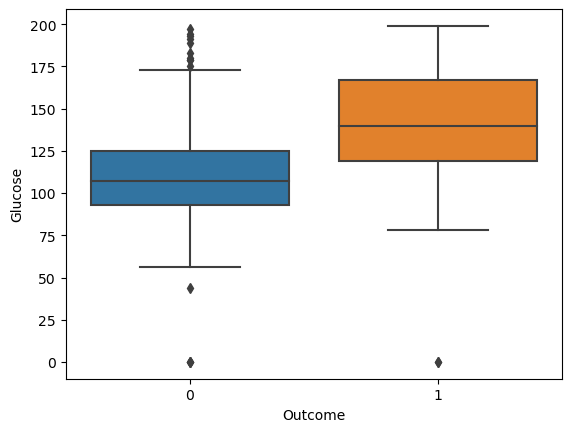

In [1027]:
# Glucose and outcome boxplot
sns.boxplot(data = df, x = 'Outcome', y = 'Glucose');

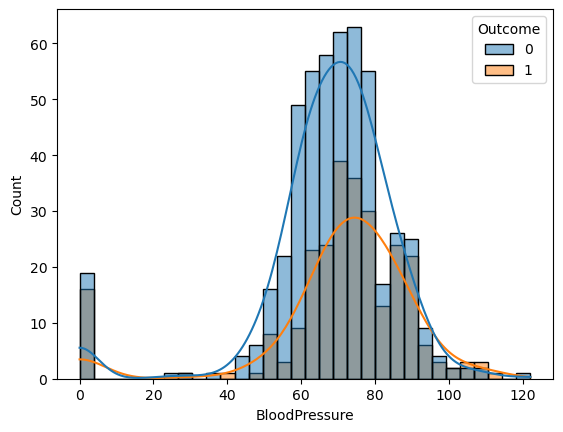

In [1028]:
# BloodPressure and outcome histogram
sns.histplot(data = df, x = 'BloodPressure', hue = 'Outcome', kde = True);

# hue is to show the box of outcome distribution on the right

# Kernel Density Estimation: kde true means will draw a curve on a histogram 

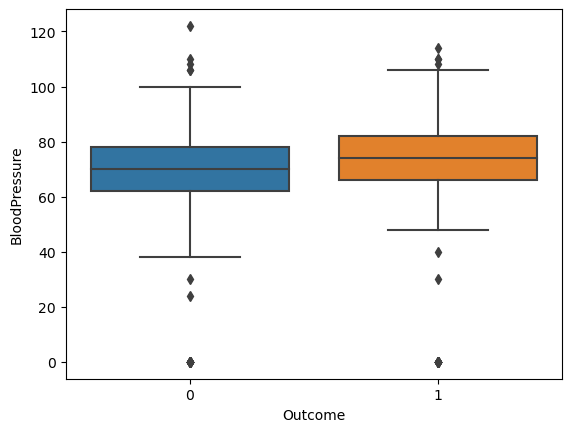

In [1029]:
# BloodPressure and outcome boxplot
sns.boxplot(data = df, x = 'Outcome', y = 'BloodPressure');

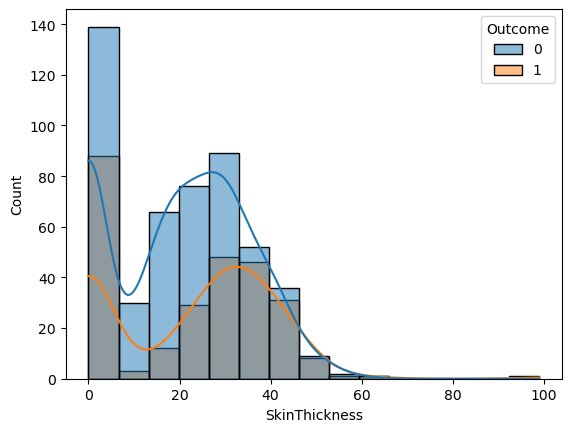

In [1030]:
# SkinThickness and outcome histogram
sns.histplot(data = df, x = 'SkinThickness', hue = 'Outcome', kde = True);

# hue is to show the box of outcome distribution on the right
# Kernel Density Estimation: kde true means will draw a curve on a histogram 

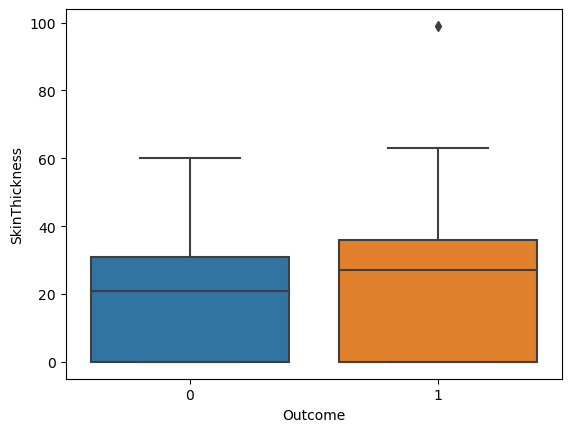

In [1031]:
# SkinThickness and outcome boxplot
sns.boxplot(data = df, x = 'Outcome', y = 'SkinThickness');

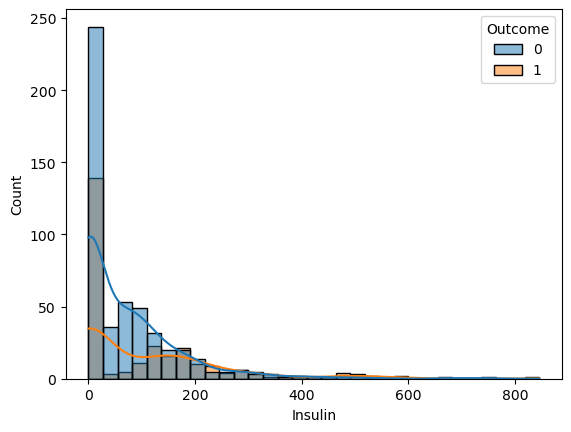

In [1032]:
# Insulin and outcome histogram
sns.histplot(data = df, x = 'Insulin', hue = 'Outcome', kde = True);

# hue is to show the box of outcome distribution on the right
# Kernel Density Estimation: kde true means will draw a curve on a histogram 

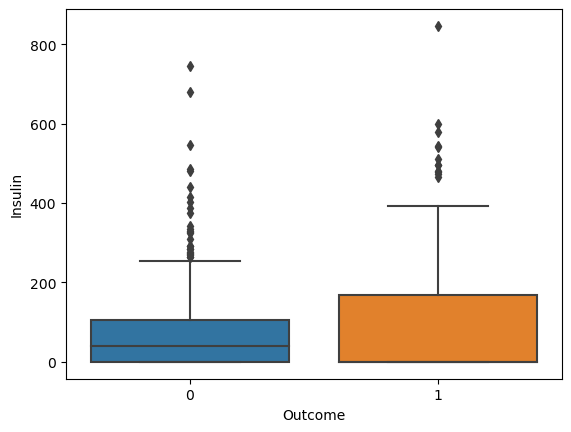

In [1033]:
# Insulin and outcome boxplot
sns.boxplot(data = df, x = 'Outcome', y = 'Insulin');

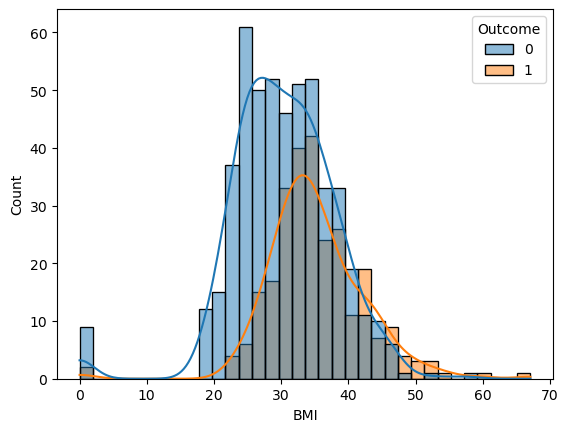

In [1034]:
# BMI and outcome histogram
sns.histplot(data = df, x = 'BMI', hue = 'Outcome', kde = True);

# hue is to show the box of outcome distribution on the right
# Kernel Density Estimation: kde true means will draw a curve on a histogram 

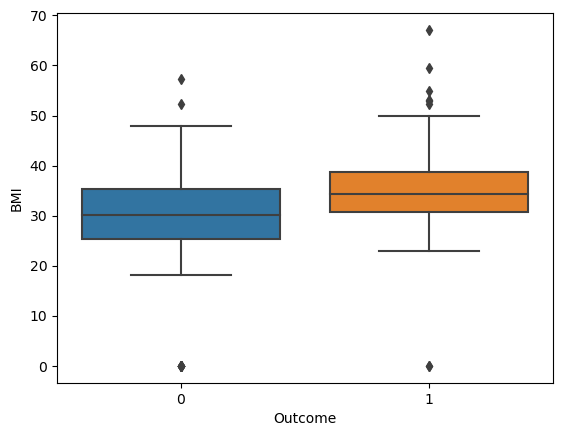

In [1035]:
# BMI and outcome boxplot
sns.boxplot(data = df, x = 'Outcome', y = 'BMI');

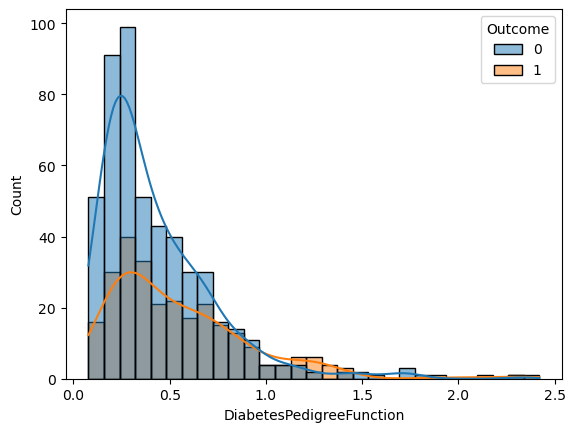

In [1036]:
# DiabetesPedigreeFunction and outcome histogram
sns.histplot(data = df, x = 'DiabetesPedigreeFunction', hue = 'Outcome', kde = True);

# hue is to show the box of outcome distribution on the right
# Kernel Density Estimation: kde true means will draw a curve on a histogram 

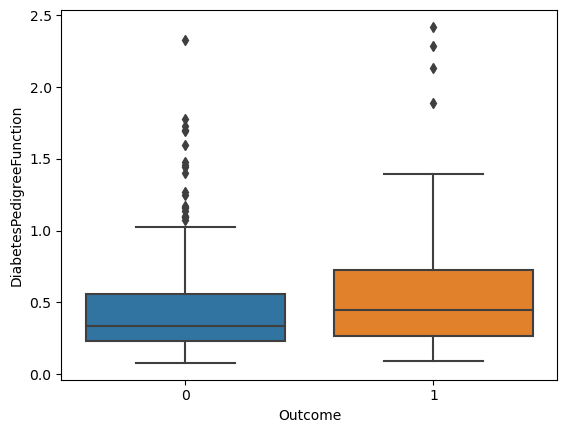

In [1037]:
# DiabetesPedigreeFunction and outcome boxplot
sns.boxplot(data = df, x = 'Outcome', y = 'DiabetesPedigreeFunction');

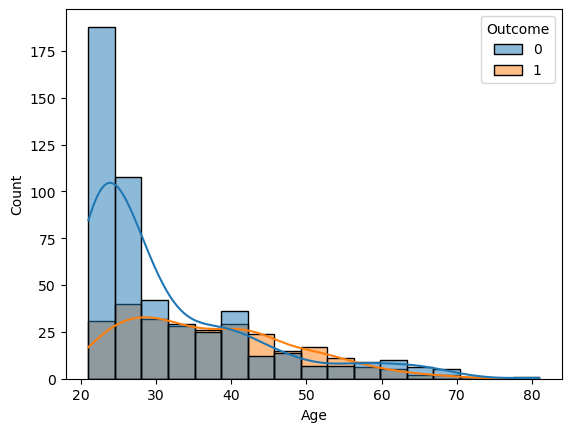

In [1039]:
# Age and outcome histogram
sns.histplot(data = df, x = 'Age', hue = 'Outcome', kde = True);

# hue is to show the box of outcome distribution on the right
# Kernel Density Estimation: kde true means will draw a curve on a histogram 

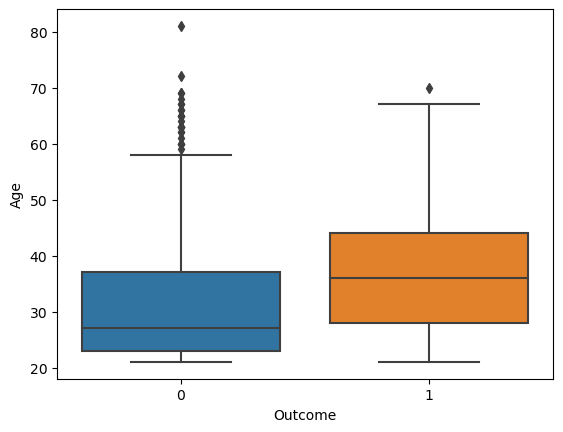

In [1040]:
# Age and outcome boxplot
sns.boxplot(data = df, x = 'Outcome', y = 'Age');

# General comments on task4
According to the histogram, people with diabetes (Outcome=1) often have higher blood glucose levels than people without diabetes (Outcome=0). 

According to the box plots, it shows that people/patients with high glucose level, BMI and age has the probability to have diabetes and are most likely to have it. high blood pressure and inulin levels shows the tendency towards diabetes. 


# 5. Data Visualization- Multivariate Analysis**  

we Use multivariate plots (correlation matrix plot and scatter plot) to:
   * A) Analyze correlations between medical variables and we will Comment on the results  
   * B) Identify potential factors that can predict diabetes in women (outcome) and we will Comment on the results.


# 5.A Analyze correlations between medical viriables and commenting on the results

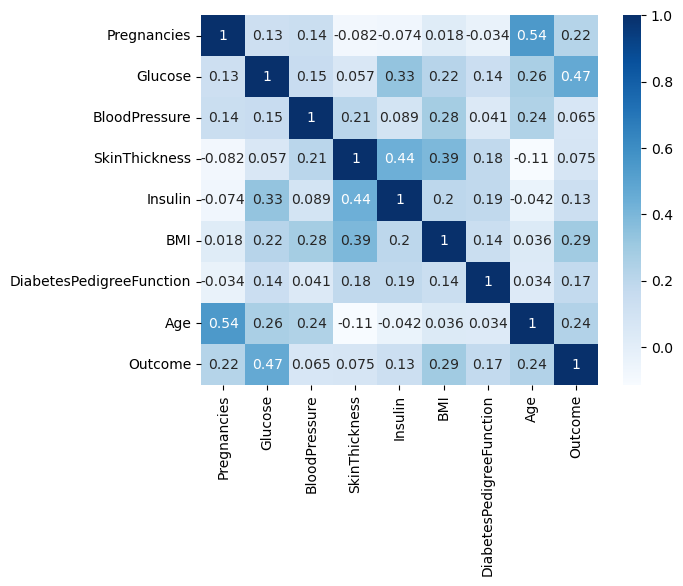

<Figure size 2000x2000 with 0 Axes>

In [1041]:
# correlation mattrix:
sns.heatmap(df.corr(), annot = True, cmap="Blues"); 
# to display numbers of correlation percentage on the heatmap use annot Ture
plt.figure(figsize=(20,20));
#cmap basically changes the default color of the heat map 

# General comment on 5.A
we can se that the glucose has the highest correlation with the outcome with  a correlation of 0.47 and the least one is the blood pressure with correlation of 0.065.
other attributes like skin Thickness, BloodPressure have low correlation with the targeted column(Outcome)

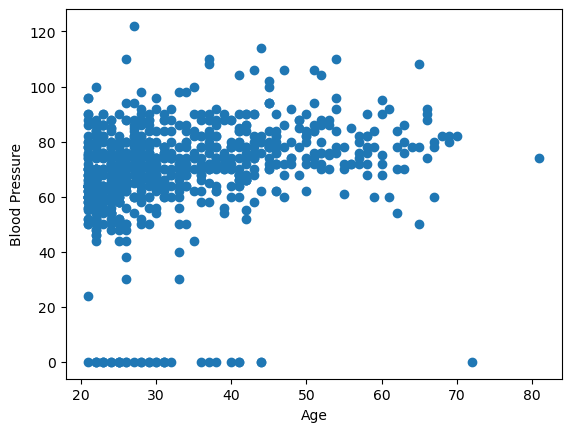

In [1070]:
#Alternative way to check the relationship between 2 numeric values 
plt.scatter(data=df, x= 'Age' , y= 'BloodPressure');
plt.xlabel('Age');
plt.ylabel('Blood Pressure');

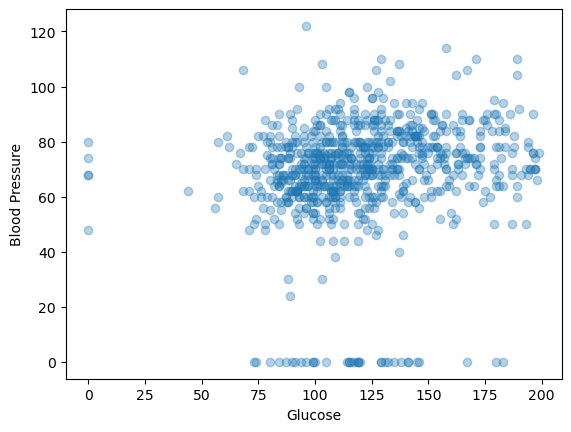

In [1072]:
#Alternative way to check the relationship between 2 numeric values 
# Jitter (regplot): to move the position of each point slightly from its true value , Alpha (scatter): for adding the transparency 
plt.scatter(data=df, x= 'Glucose' , y= 'BloodPressure', alpha = 1/3);
plt.xlabel('Glucose');
plt.ylabel('Blood Pressure');

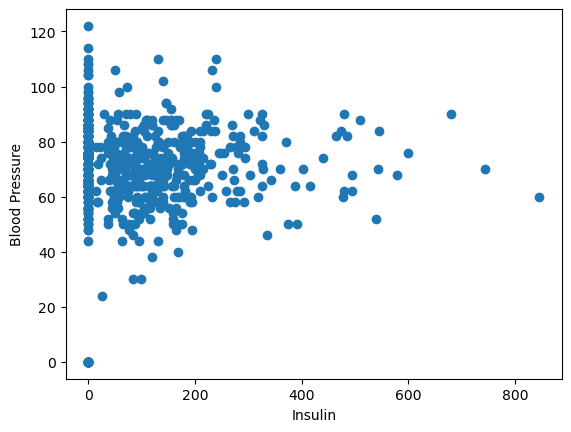

In [1073]:
#Alternative way to check the relationship between 2 numeric values 
plt.scatter(data=df, x= 'Insulin' , y= 'BloodPressure');
plt.xlabel('Insulin');
plt.ylabel('Blood Pressure');

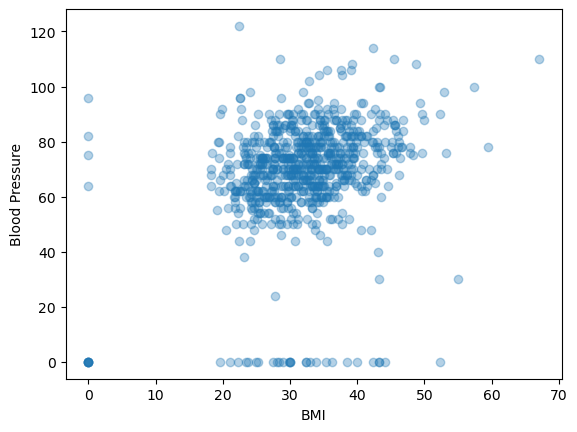

In [1074]:
#Alternative way to check the relationship between 2 numeric values 
# Jitter (regplot): to move the position of each point slightly from its true value , Alpha (scatter): for adding the transparency 
plt.scatter(data=df, x= 'BMI' , y= 'BloodPressure', alpha = 1/3);
plt.xlabel('BMI');
plt.ylabel('Blood Pressure');

# 5. B Identify potential factors that can predict diabetes in women (outcome) and we will Comment on the results.


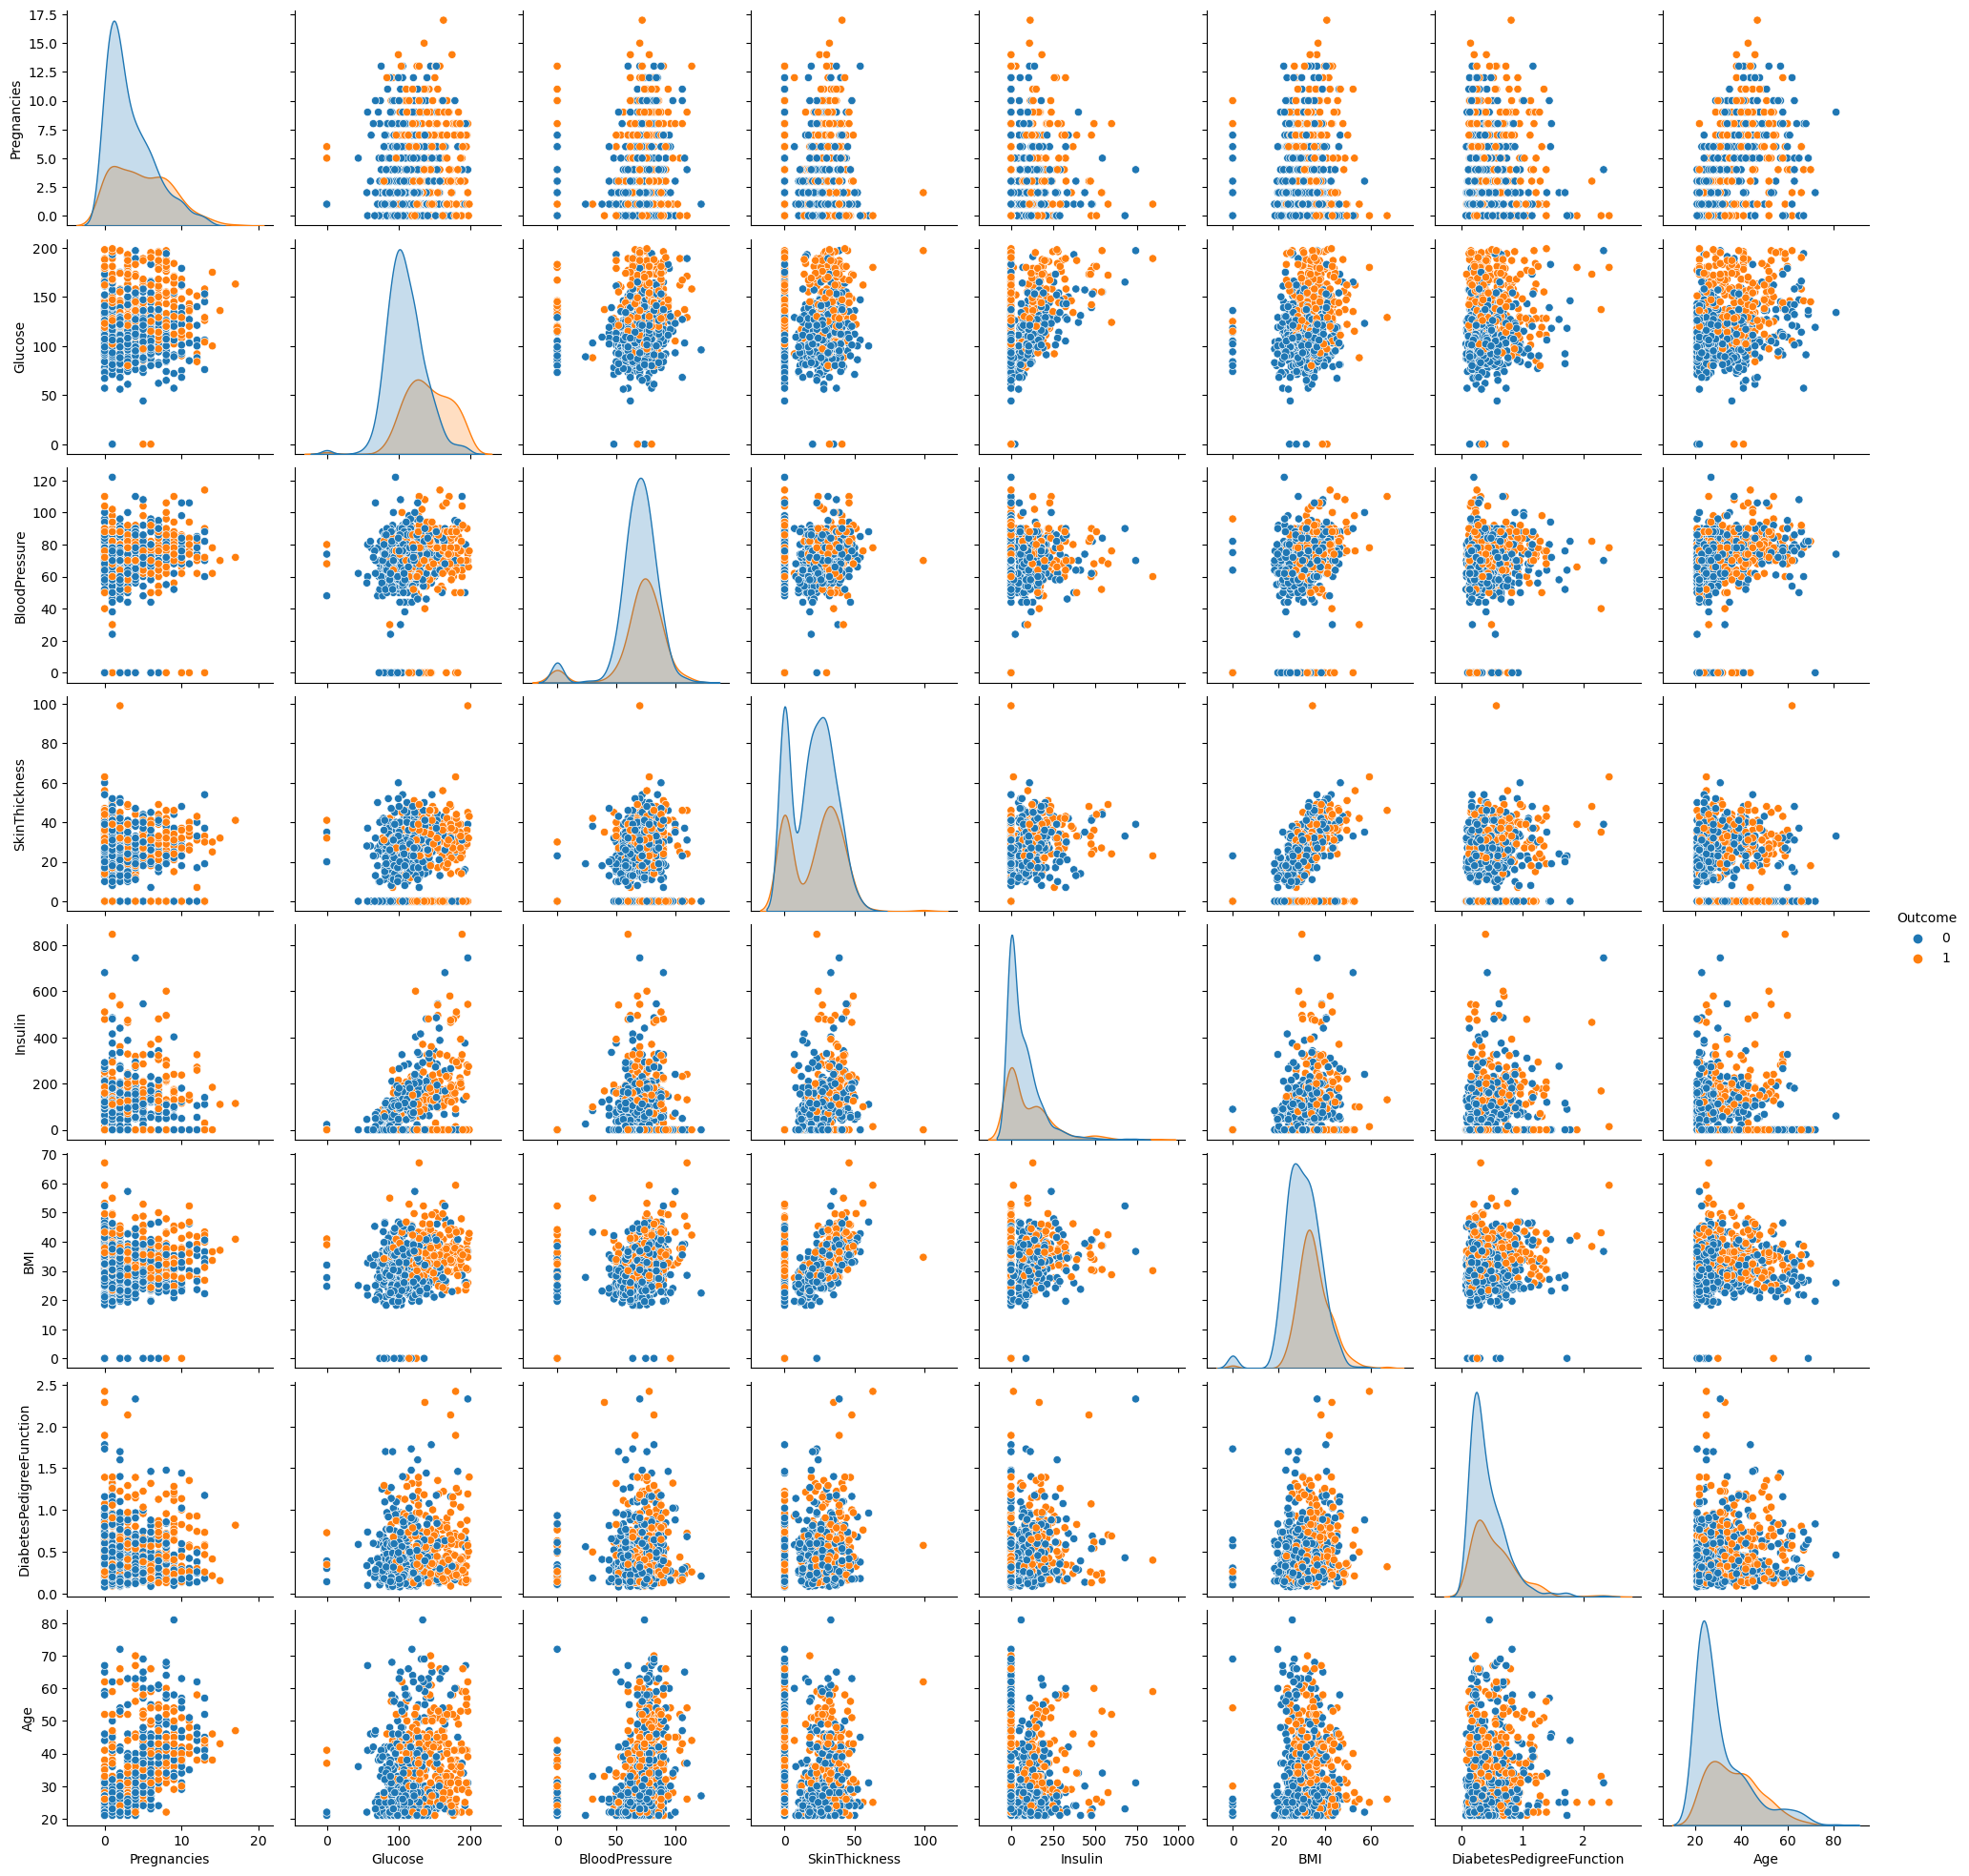

<Figure size 2500x2000 with 0 Axes>

In [1042]:
# scatter plot matrix
sns.pairplot(data=df, vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], hue = 'Outcome')
plt.show()
plt.figure(figsize=(25,20));

# commenting on 5.B
the above scatter plot shows that the glucose levels are dependent on the diabetes and non diabetes people, and obviously the pateints with diabetes have high glucose than the other patients.


Moreover the Age and Insulin are playing a great role in indicating the diabetes in a patient.
 
To add more, we can see form the pairplot above that there are patients that have diabetes (orange color) and the non-diabetec patients(blue color) 
the higher the glucose level in the petient's blood stream the more tendency for that patient to have diabetes. 
There is also little overlap between attriburtes. 

so this states that the glucose level is a strong predictor of diabetes in women. 

# 6. Data Cleaning** 
we will Identify and remove any outliers in the medical variables and Explain the rationale for identifying and removing outliers.

In [1043]:
# first identify sum of the null values in the dataframe
df.isnull().sum()
# no nulls were detected

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [1064]:
df.info()
# this is another way to check for null values, will print the count of null/non-null values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [1044]:
# create a copy from the df to work on it from now onwards, to not affect the actual dataframe.
df_copy = df.copy()
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


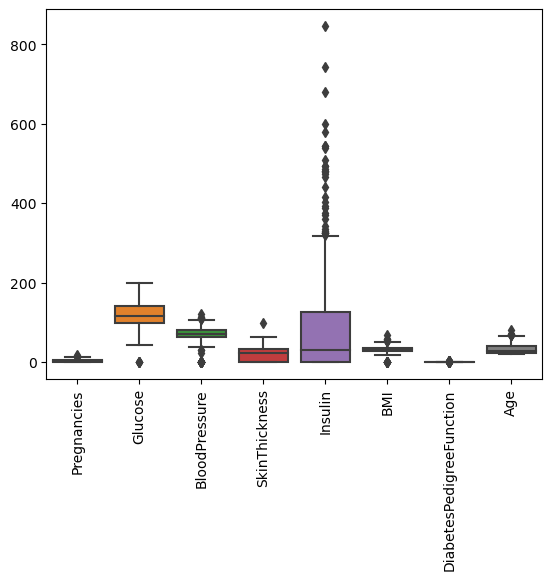

In [1045]:
# plotting the dataset to see outliers before removing them
sns.boxplot(data=df.iloc[:, :-1])
plt.xticks(rotation = 90)
plt.show()

## outliers box plot comment 
as we can see there are many outliers, especially in Insulin attribute, we should handle these outliers either by removing them, or replacing them with the median value for each column because the median is less sensitive towards outliers than mean. 

# Winsorization means 
The largest value that isn't an outlier should be used to replace all of the outliers. the substitution of extreme values

In [1046]:
# using winsorization to replace extreme values(outliers)
from scipy.stats.mstats import winsorize

In [1080]:
# Another way of reducing outliers using Winsorize Method
# Here i was trying to find away to remove the outliers using winsorization method 
winsorize(df_copy_no_outliers, limits=[0.1, 0.2])

TypeError: '<' not supported between instances of 'str' and 'float'

In [1047]:
# identify number of outliers

Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
# detection of outliers
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR 
upper = Q3 + 1.5 * IQR
lower_bound = df_copy < lower
upper_bound = df_copy > upper


total_numbers_of_outliers = (lower_bound+upper_bound).sum()
total_numbers_of_outliers
# anything thats above the upper bound and lower than the low bound will be cosidered as  outlier



Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

In [1048]:
# row # 5 (4) and column 6shows 2.88 as an outlier value for now 
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [1049]:
df_copy.isnull().sum()
# also no null values detected from the dataframe copy

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [1050]:
# removing outliers method 1
# this will take the numbers in a df which are between the lower and upper bound include the low and up values 
# then what ever is outside this bound will be removed
# df_remove_outliers = df_copy[(df_copy >= lower) & (df_copy <= upper)]
# df_remove_outliers

In [1051]:
# removing outliers method 2
df_copy_no_outliers = df_copy[~(lower_bound | upper_bound)]
df_copy_no_outliers
# ~ this symbol means (not in) 
# NaN is visible here in row 4 and column 6 (Diabetes Pedigree Function), 
#because it was an outlier and we removed it so 
    # it was replaced by a null value
# i didnt remove outliers permemnantly because if i do so 
# my dataset will be hard to debug, and will affect the 
# accuracy of my model.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


rows should be dropped when doing this method when removing outliers 
but couldn't know how to fix it

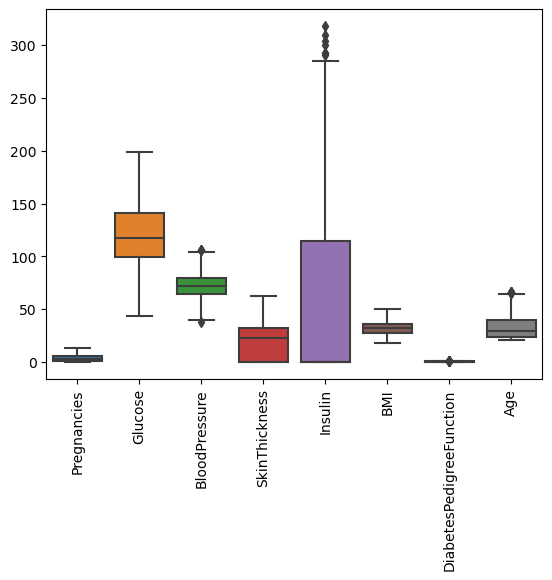

In [1052]:
# plotting dataset after detecting and removing outliers, some are still shown couldn't fix it
# outliers have been decreased 
sns.boxplot(data=df_copy_no_outliers.iloc[:, :-1])
plt.xticks(rotation = 90)
plt.show()

In [1053]:
# identify number of outliers after removing outliers, some are still shown couldn't fix it
# number of outliers decreased

Q1 = df_copy_no_outliers.quantile(0.25)
Q3 = df_copy_no_outliers.quantile(0.75)
# detection of outliers
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR 
upper = Q3 + 1.5 * IQR
lower_bound = df_copy_no_outliers < lower
upper_bound = df_copy_no_outliers > upper


total_numbers_of_outliers = (lower_bound+upper_bound).sum()
total_numbers_of_outliers
# anything thats above the upper bound and lower than the low bound will be cosidered as  outlier



Pregnancies                  0
Glucose                      0
BloodPressure                4
SkinThickness                0
Insulin                      7
BMI                          0
DiabetesPedigreeFunction    12
Age                          7
Outcome                      0
dtype: int64

# Rationale
Outliers are extreme values that differ from most other data points in a dataset.

Outliers can affect Normalization, and our statistical calculations of the our(mean, median, mode), which will then affect the whole system or model. 

Can happen due to, data entry errors, experimental Errors, Sampling Errors, Natural Occurences, Measurmental Errors
Natural Occurances such as: 

here I identified the number of outliers in each colomn in the dataset with calculating Q1, Q3 and the IQR and then determining the upper and lower bonds. We can also visualize using boxplots as they will show outliers significantlly. the outliers will be determined by the data points that are outside the whiskers. 

so by removing these outliers in our dataset, we will now complete our analysis with confidence that our dataset is accurate and not biased towards some datapoints. 


as a general rule, if 5% of the observations are located beyond the 95% CIs, this would be considered acceptable.

Winsorization is the practice of swapping out statistical data's extreme values in order to reduce the impact of outliers on calculations or findings produced using that data. Winsorized mean is the term used to describe the mean value determined following such replacement of the extreme values.



In the case of 90% winsorization, the top 5% and bottom 5% of the data are replaced. The 95th percentile of the data is used to replace the top 5% of the data, and the 5th percentile of the data is used to replace the lowest 5% of the data.

# 6. Data Imputation 

Doctors know that the range of Glucose, Insulin, BMI, and blood pressure can never start from Zero. However, the dataset includes many zero records for these medical variables. we will impute these zero records using appropriate methods and provide a detailed explanation in the comments.

In [1054]:
# impute zero valuesdf_copy_no_outliers to Nan
df_copy_no_outliers[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = df_copy_no_outliers[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [1055]:
# replacing the nan that showed up after removing the outliers by the mean of each related column
df_copy_no_outliers = df_copy_no_outliers.fillna(df_copy.mean())
df_copy_no_outliers 
# this will calculate the mean for each column and replace that mean in that related column by the zero there.
# to test if the filled value is correct
#df['SkinThickness'].mean()
#df['Insulin'].mean()
#df['DiabetesPedigreeFunction'].mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627000,50.0,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351000,31.0,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672000,32.0,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167000,21.0,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,0.471876,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171000,63.0,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340000,27.0,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245000,30.0,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349000,47.0,1


# General Comment on task7
as soon as we removed the outliers from our actuall dataset, we will notice that they were replaced with NaN, which means null and empty. we should now impute/replace this Null values most likely by the mean because mean are sensitive towards outliers, unlike median which is not really affected by outliers. 

# 7. Data Scaling
we will check Do you need to use any data scaling techniques on the medical variables of this dataset, if so we will explain why

In [1056]:
# using Normalization
# normalization means to put things into range of 0and 1 to make the values on same scale
# and prevent outliers from different models attributes

#new df after replcing NaNs 
df_copy = df_copy_no_outliers
#normalize values the whole dataframe
df_norm = (df_copy-df_copy.min())/ (df_copy.max() - df_copy.min())

#view normalized DataFrame
df_norm


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.416667,0.670968,0.500000,0.500000,0.216446,0.484277,0.493261,0.644444,1.0
1,0.000000,0.264516,0.411765,0.392857,0.216446,0.264151,0.245283,0.222222,0.0
2,0.583333,0.896774,0.382353,0.241722,0.216446,0.160377,0.533693,0.244444,1.0
3,0.000000,0.290323,0.411765,0.285714,0.263158,0.311321,0.079964,0.000000,0.0
4,0.237088,0.600000,0.029412,0.500000,0.506579,0.783019,0.353887,0.266667,1.0
...,...,...,...,...,...,...,...,...,...
763,0.750000,0.367742,0.558824,0.732143,0.546053,0.462264,0.083558,0.933333,0.0
764,0.083333,0.503226,0.470588,0.357143,0.216446,0.584906,0.235400,0.133333,0.0
765,0.333333,0.496774,0.500000,0.285714,0.322368,0.251572,0.150045,0.200000,0.0
766,0.000000,0.529032,0.323529,0.241722,0.216446,0.374214,0.243486,0.577778,1.0


# Comment on task7
scaling means to separate the features(perdictors columns) and the targeted vars
We can scale data into new values that are easier to compare especially if we have different measurment units which could be difficult to be compared. in our dataset for example, glucose could be measured in mg/dL, and BMI is measured in Kg/m^2. this could cause biased results if not scaled and could affect our machine learning model. or normalize the dataset. 

So, I recommend using scaling techniques (Standarization or normalization) especially that our dataset contains medical records that need to  be rescaled to let them be in same scale. 

# 8. Feature Engineering
* A) we will check the need of me engineering any attributes (created new attributes), If yes, i will explain the rationale and how the new attributes were used in the analysis
* B) and we will see If we need to exclude any attributes from the analysis, and provide an explanation why i believe they can be excluded.

# 8.A

In [1057]:
#add new diabetes indicator column by the glucose level in the blood stream
def indicate_diabetes(sugar_level):
    if sugar_level <= 99:
        return 'Normal'
    elif sugar_level >= 100 and sugar_level <= 125:
        return 'Prediabetec'
    else: # which is higher than 125
        return 'diabetec'
    
# create new attribute df['new_attr'] and use .apply function to add it to the df
df_copy['Diabetes indicator'] = df_copy['Glucose'].apply(indicate_diabetes)
df_copy.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes indicator
0,6.000000,148.0,72.000000,35.000000,79.799479,33.600000,0.627000,50.0,1,diabetec
1,1.000000,85.0,66.000000,29.000000,79.799479,26.600000,0.351000,31.0,0,Normal
2,8.000000,183.0,64.000000,20.536458,79.799479,23.300000,0.672000,32.0,1,diabetec
3,1.000000,89.0,66.000000,23.000000,94.000000,28.100000,0.167000,21.0,0,Normal
4,3.845052,137.0,40.000000,35.000000,168.000000,43.100000,0.471876,33.0,1,diabetec
5,5.000000,116.0,74.000000,20.536458,79.799479,25.600000,0.201000,30.0,0,Prediabetec
6,3.000000,78.0,50.000000,32.000000,88.000000,31.000000,0.248000,26.0,1,Normal
7,10.000000,115.0,69.105469,20.536458,79.799479,35.300000,0.134000,29.0,0,Prediabetec
8,2.000000,197.0,70.000000,45.000000,79.799479,30.500000,0.158000,53.0,1,diabetec
9,8.000000,125.0,96.000000,20.536458,79.799479,31.992578,0.232000,54.0,1,Prediabetec


# general comment on task 8.A
Yes i added new attribute which is the diabetes indicator based on the glucose level in the blood stream. which indicates if the patient is diabetec or non diabetec(normal) or prediabetec. the logical reason behind this solution according to the American Diabetes Association (ADA) is that  the glucose indicates the amount of sugar that is present in your bloodstream at a given time. The level of glucose in the blood is tightly regulated by hormones, such as insulin and glucagon, which are produced by the pancreas. categorizing glucose level is esential to help in identifying petients who are truly diabetec, or have the potential to have diabetes, or they are non-diabetec. And most likely that the blood test should be repeated to avoid false positive which means a result that indicates a petient is diabetec when he's does not having symptoms. in summary, monitoring and maintaining healthy blood glucose levels is important for overall health and can help prevent long-term complications associated with diabetes and other metabolic disorders.

# 8.B

In [1058]:
# check the correlation between features columns and the outcome column
df['SkinThickness'].corr(df['Outcome'])

0.07475223191831955

In [1059]:
df['BloodPressure'].corr(df['Outcome'])

0.0650683595503328

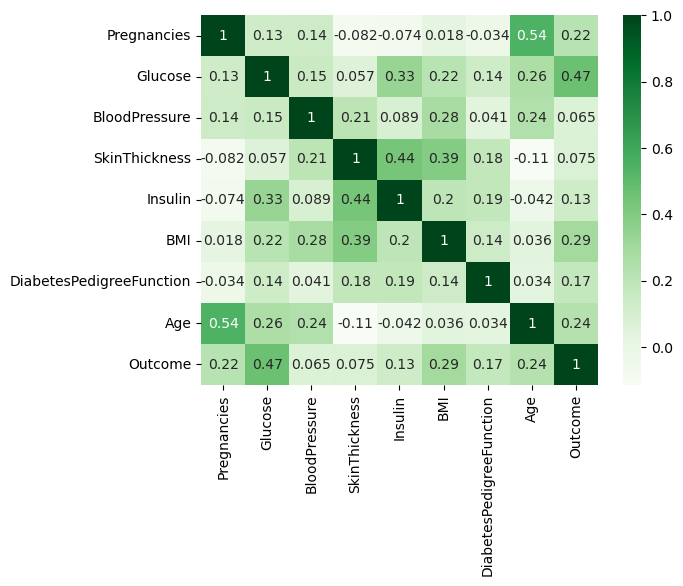

<Figure size 2000x2000 with 0 Axes>

In [1060]:
# correlation mattrix:
sns.heatmap(df.corr(), annot = True, cmap="Greens"); 
# to display numbers of correlation percentage on the heatmap use annot Ture
plt.figure(figsize=(20,20));
#cmap basically changes the default color of the heat map 

In [1061]:
# the column with low correlation with the targeted column will be dropped.
df_copy.drop('SkinThickness',axis = 1,inplace = True)
df_copy.drop('BloodPressure',axis = 1,inplace = True)
df_copy

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes indicator
0,6.000000,148.0,79.799479,33.6,0.627000,50.0,1,diabetec
1,1.000000,85.0,79.799479,26.6,0.351000,31.0,0,Normal
2,8.000000,183.0,79.799479,23.3,0.672000,32.0,1,diabetec
3,1.000000,89.0,94.000000,28.1,0.167000,21.0,0,Normal
4,3.845052,137.0,168.000000,43.1,0.471876,33.0,1,diabetec
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,180.000000,32.9,0.171000,63.0,0,Prediabetec
764,2.000000,122.0,79.799479,36.8,0.340000,27.0,0,Prediabetec
765,5.000000,121.0,112.000000,26.2,0.245000,30.0,0,Prediabetec
766,1.000000,126.0,79.799479,30.1,0.349000,47.0,1,diabetec


# general comment on task 8.B

In this task i found the correlation between each attribute(predictors columns) and the targeted column (Outcome), and the SkinThickness & BloodPleasure columns had very correlation with the outcome with values 0.74 and 0.65 respectively. 

so removing/dropping them won't affect our model accuracy.

they also seem irrelevant like they are not really contributing whether a patient is diabetec or no. if there is a diabetec patient then the blood pressure would be high a bit but thats not necessary. 

so excluding irrelevant or redundant attributes can improve the accuracy and credibility of the dataframe analysis. 